In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_0f25df31136440129c11d2a1e21512d7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y8Q4OQdNSWrbptAbJHp0OtBHrSl11atDNyJM45RvgSV7',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0f25df31136440129c11d2a1e21512d7.get_object(Bucket='assert-donotdelete-pr-01ivohmp6jknjb',Key='Assert failure prediction.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Failure
0,67,82,291,1,1,1041,846,No
1,68,77,1180,1,1,1915,1194,No
2,64,76,1406,1,1,511,1577,No
3,63,80,550,1,1,1754,1834,No
4,65,81,1928,1,2,1326,1082,No


In [3]:
dataset

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Failure
0,67,82,291,1,1,1041,846,No
1,68,77,1180,1,1,1915,1194,No
2,64,76,1406,1,1,511,1577,No
3,63,80,550,1,1,1754,1834,No
4,65,81,1928,1,2,1326,1082,No
5,67,84,398,1,2,1901,1801,No
6,67,83,847,0,2,1849,1141,No
7,67,76,1021,2,1,185,170,No
8,65,80,1731,2,0,1424,1176,No
9,63,80,415,0,0,1008,1086,No


In [4]:
x=dataset.iloc[:,:7].values 
x

array([[  67,   82,  291, ...,    1, 1041,  846],
       [  68,   77, 1180, ...,    1, 1915, 1194],
       [  64,   76, 1406, ...,    1,  511, 1577],
       ..., 
       [  61,   77,  595, ...,    1, 1659, 1134],
       [  72,   81, 1038, ...,    2,  254, 1400],
       [  60,   82,  399, ...,    1,  324, 1424]])

In [5]:
y=dataset.iloc[:,7:].values

In [6]:
y

array([['No'],
       ['No'],
       ['No'],
       ..., 
       ['No'],
       ['No'],
       ['No']], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb=LabelEncoder()
y[:,0]=lb.fit_transform(y[:,0])
y

array([[0],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]], dtype=object)

In [9]:
x

array([[  67,   82,  291, ...,    1, 1041,  846],
       [  68,   77, 1180, ...,    1, 1915, 1194],
       [  64,   76, 1406, ...,    1,  511, 1577],
       ..., 
       [  61,   77,  595, ...,    1, 1659, 1134],
       [  72,   81, 1038, ...,    2,  254, 1400],
       [  60,   82,  399, ...,    1,  324, 1424]])

In [10]:
y=y.astype('int')

In [11]:
y

array([[0],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
y_pred=classifier.predict(x_test)

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
classifier.predict([[77,69,869,0,1,1492,1779]])

array([1])

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) 
cm

array([[2176,    0],
       [   7,   13]])

In [20]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

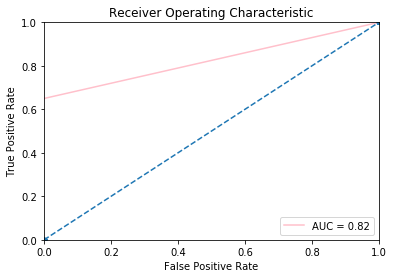

In [21]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,color='pink',label='AUC = %0.2f'%roc_auc) #color='pink' can also be replaced as 'p'
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'p--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [22]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-07-16 08:02:08,692 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [23]:
wml_credentials={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "access_key":"yWsHFKDUpOHRe7XsfT6oBOq34BteoCbQ8FNngBikFSbQ",
    "username":"47395f8f-92e2-4777-91aa-c293f043243e",
    "password":"2d2510dc-d02d-4a6d-84d8-43bc61e4c791",
    "instance_id":"0140ddcd-dad2-4443-bbf5-478cf3ecc0c4"
}


In [24]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [25]:
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"MUNI",
             client.repository.ModelMetaNames.AUTHOR_EMAIL:"abcd@gmail.com",
             client.repository.ModelMetaNames.NAME:"RandomForestClassifier"
             
             }


In [26]:

model_artifact=client.repository.store_model(classifier,meta_props=model_props)

In [27]:
published_model_uid=client.repository.get_model_uid(model_artifact)

In [28]:
created_deployment=client.deployments.create(published_model_uid,name='RandomForestClassifier')



#######################################################################################

Synchronous deployment creation for uid: '8f69ea85-733a-43ea-b9b4-ad625254d014' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c86d9f76-4969-4e20-857b-d40626acd28b'
------------------------------------------------------------------------------------------------




In [29]:

scoring_endpoint=client.deployments.get_scoring_url(created_deployment)

In [30]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0140ddcd-dad2-4443-bbf5-478cf3ecc0c4/deployments/c86d9f76-4969-4e20-857b-d40626acd28b/online'